In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [215]:
reactor_cap_list = 1000. * np.array([20, 17.5, 15, 12.5, 10., 7.5, 5., 2.5, 1.])
turb_ratio_list = 1.0 * np.array([4, 3, 2, 1])
# reactor_cap_list = np.arange(1000.0, 21000.0, 1000.0)
# turb_ratio_list = np.arange(1.0, 4.5, 0.5)
therm_stor_list = np.array([1500.0])
therm_dis_ratio_list = np.array([300.0])

In [216]:
result_dir = Path.cwd().joinpath('Results')
result_dir.is_dir()

True

In [217]:
results = np.zeros([len(reactor_cap_list), len(turb_ratio_list)], dtype=float)

In [218]:
for i, reactor_cap in enumerate(reactor_cap_list):
    for j, turb_ratio in enumerate(turb_ratio_list):
        file_name = 'ReactorCap_{}_TurbRatio_{}_ThermStor_{}_ThermDisRatio_{}/fusion_var.csv'.format(reactor_cap, turb_ratio, therm_stor_list[0], therm_dis_ratio_list[0])
        file_path = result_dir.joinpath(file_name)
        if not file_path.is_file():
            continue
        df = pd.read_csv(file_path)
        results[i,j] = np.abs(df['Gross_Cap_Dual'])

In [219]:
r = 0.06
l = 40
annuit_factor = (1 - (1 + r)**(-l)) / r

capex_results = results * annuit_factor / 1e3

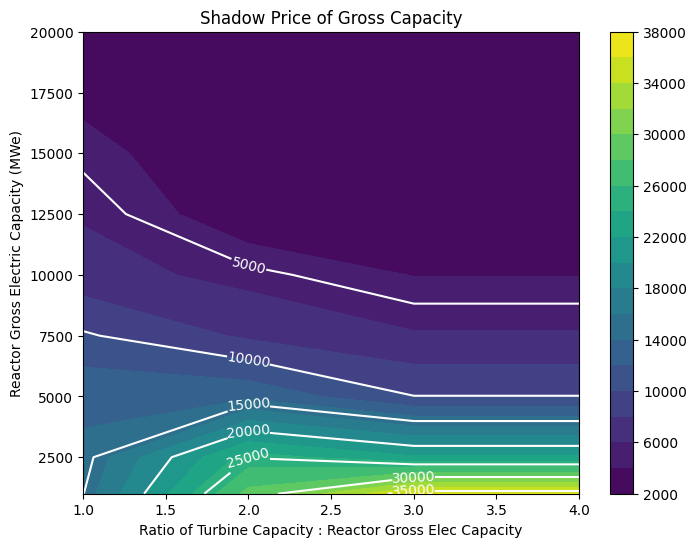

In [220]:
fig, ax = plt.subplots(figsize=(8,6))
cs = ax.contourf(turb_ratio_list, reactor_cap_list, capex_results, levels=20, cmap='viridis')
ds = ax.contour(turb_ratio_list, reactor_cap_list, capex_results, levels=np.arange(5000,40000,5000), colors='white')
ax.clabel(ds, inline=1, fontsize=10)
ax.set_xlabel('Ratio of Turbine Capacity : Reactor Gross Elec Capacity')
ax.set_ylabel('Reactor Gross Electric Capacity (MWe)')
ax.set_title('Shadow Price of Gross Capacity')
fig.colorbar(cs, ax=ax)

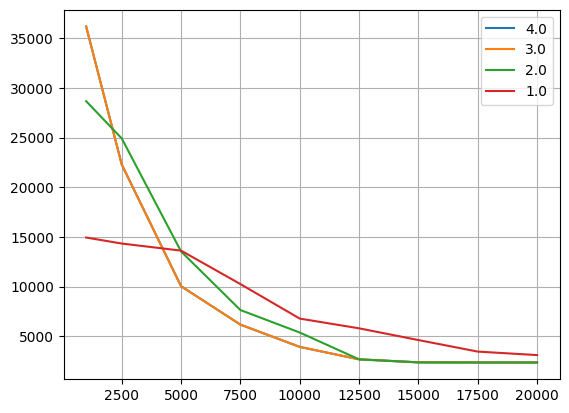

In [221]:
for i in range(4):
    plt.plot(reactor_cap_list, capex_results[:,i], label = turb_ratio_list[i])
plt.grid(True)
plt.legend()

In [222]:
turb_ratio_list

array([4., 3., 2., 1.])

In [223]:
reactor_cap_list = np.arange(1000.0, 21000.0, 1000.0)
turb_ratio_list = np.arange(1.0, 4.5, 0.5)

results = np.zeros([len(reactor_cap_list), len(turb_ratio_list)], dtype=float)

result_dir = Path.cwd().joinpath('Results')

for i, reactor_cap in enumerate(reactor_cap_list):
    for j, turb_ratio in enumerate(turb_ratio_list):
        file_name = 'ReactorCap_{}_TurbRatio_{}_ThermStor_{}_ThermDisRatio_{}/fusion_var.csv'.format(reactor_cap, turb_ratio, therm_stor_list[0], therm_dis_ratio_list[0])
        file_path = result_dir.joinpath(file_name)
        if not file_path.is_file():
            continue
        df = pd.read_csv(file_path)
        results[i,j] = np.abs(df['Gross_Cap_Dual'])

r = 0.06
l = 40
annuit_factor = (1 - (1 + r)**(-l)) / r

capex_results = results * annuit_factor / 1e3

Text(0.5, 1.0, 'CAPEX Value of Fusion Power Plant (\\$/kWe)')

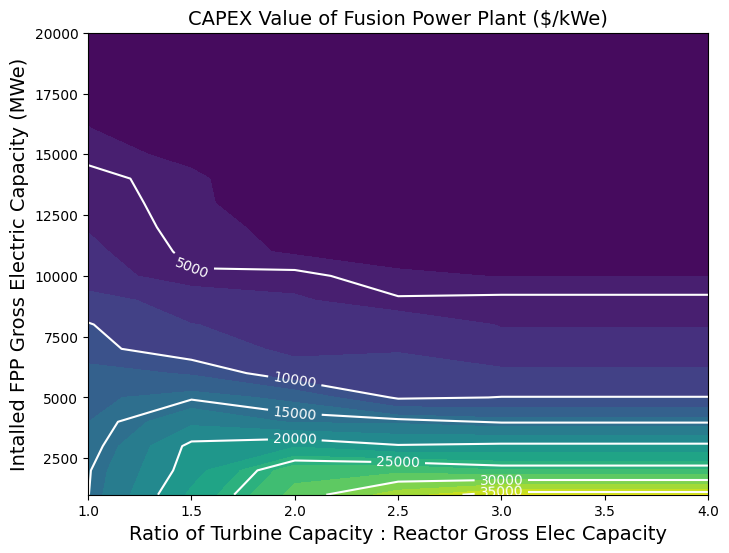

In [237]:
fig, ax = plt.subplots(figsize=(8,6))
cs = ax.contourf(turb_ratio_list, reactor_cap_list, capex_results, levels=20, cmap='viridis')
ds = ax.contour(turb_ratio_list, reactor_cap_list, capex_results, levels=np.arange(5000,40000,5000), colors='white')
ax.clabel(ds, inline=1, fontsize=10)
ax.set_xlabel('Ratio of Turbine Capacity : Reactor Gross Elec Capacity', fontsize=14)
ax.set_ylabel('Intalled FPP Gross Electric Capacity (MWe)', fontsize=14)
ax.set_title('CAPEX Value of Fusion Power Plant (\$/kWe)', fontsize=14)
# fig.colorbar(cs, ax=ax)

Text(0.5, 1.0, 'CAPEX Value of Fusion Power Plant (\\$/kWe)')

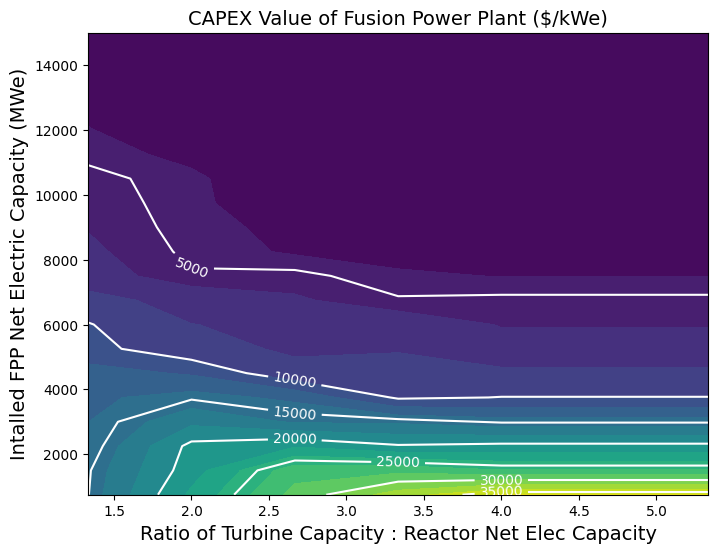

In [238]:
fig, ax = plt.subplots(figsize=(8,6))
cs = ax.contourf(turb_ratio_list / 0.75, 0.75 * reactor_cap_list, capex_results, levels=20, cmap='viridis')
ds = ax.contour(turb_ratio_list / 0.75, 0.75 * reactor_cap_list, capex_results, levels=np.arange(5000,40000,5000), colors='white')
ax.clabel(ds, inline=1, fontsize=10)
ax.set_xlabel('Ratio of Turbine Capacity : Reactor Net Elec Capacity', fontsize=14)
ax.set_ylabel('Intalled FPP Net Electric Capacity (MWe)', fontsize=14)
ax.set_title('CAPEX Value of Fusion Power Plant (\$/kWe)', fontsize=14)

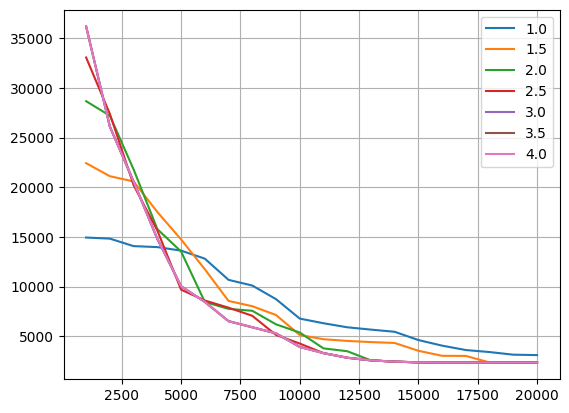

In [225]:
for i in range(len(turb_ratio_list)):
    plt.plot(reactor_cap_list, capex_results[:,i], label = turb_ratio_list[i])
plt.grid(True)
plt.legend()